# 簡單線性回歸
* 建構環境

In [ ]:
# 資料處理套件
import pandas as pd
import numpy as np
import scipy.stats as stats
# 安裝、下載並導入中文字型
!pip install wget
import wget
wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
# 互動及構圖套件
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib as mlp
mlp.rc('font',family = "ChineseFont")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=85bc83a4d92151bb869ccc68210d0bae3e7b65abd4754659cf18052eee2d6d83
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


* 資料建構與分佈呈現

Text(0, 0.5, '薪資')

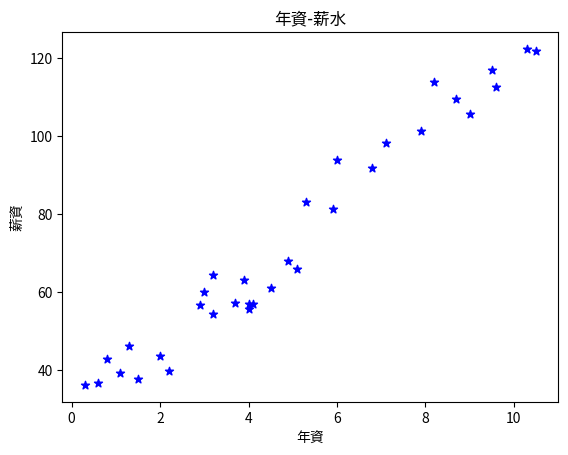

In [5]:
data = pd.read_csv('Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']
# 畫圖
plt.scatter(x, y, marker='*', c='b')
plt.title('年資-薪水')
plt.xlabel('年資')
plt.ylabel('薪資')
# 散佈圖呈現出

* 建構散佈圖

In [6]:
data = pd.read_csv('Salary_Data.csv')
def pred(w, b):
  y_pred = w * x + b
  plt.plot(x, y_pred, c='r', label='預測資料')
  plt.scatter(x, y, c='b', label='真實資料')
  plt.xlim([0,10])
  plt.ylim([0,130])
  plt.legend()
  plt.show()
interact(pred, w=(0,10,1), b=(0,50,10))
# 透過散佈圖，看到資料分佈可能有線性關係
# 當w=9, b=30時，比較接近最佳解

interactive(children=(IntSlider(value=5, description='w', max=10), IntSlider(value=20, description='b', max=50…

<function __main__.pred(w, b)>

* 驗證線性關係(皮爾森線性相關係數)

In [8]:
stats.pearsonr(x, y)
# PearsonRResult(statistic=0.978918676118485, pvalue=5.97709254964315e-23)
# R-square絕對值接近1，且P-value小於0.05，拒絕虛無假設(H0:ρ=0)
# 年資與薪資間存在線性關係

PearsonRResult(statistic=0.978918676118485, pvalue=5.97709254964315e-23)

* 查看損失函數

Text(0, 0.5, 'L')

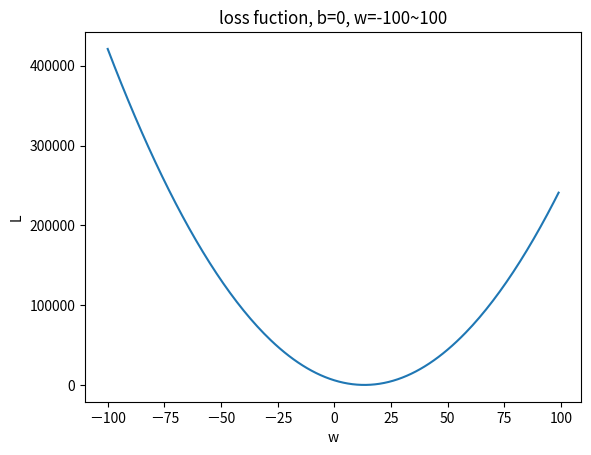

In [9]:
# 建構計算損失的函數
def compute_loss(x, y, w, b):
  y_pred = w*x + b
  loss = ( y - y_pred )**2
  loss = loss.sum() / len(x)  # (e1 + e2 + e3 + ... + en) / n
  return loss
# 建構迴圈記錄各截點的損失(暫不考慮截距項)
total_loss = []
for w in range(-100, 100):
  loss = compute_loss(x, y, w, 0)
  total_loss.append(loss)
# 構圖來看損失函數的分佈
plt.plot(range(-100,100),total_loss)
plt.title("loss fuction, b=0, w=-100~100")
plt.xlabel("w")
plt.ylabel("L")
# 由圖可推測，w落在約10左右損失最小，待進一步驗證

* 利用numpy計算並記錄損失

In [10]:
temp_w = np.arange(-100,101)
temp_b = np.arange(-100,101)
point_loss = np.zeros((201,201))

i = 0
for w in temp_w:
  j = 0
  for b in temp_b:
    loss = compute_loss(x, y, w, b)
    point_loss[i,j] = loss
    j = j+1
  i = i + 1

* 建構立體圖，找到損失最低點

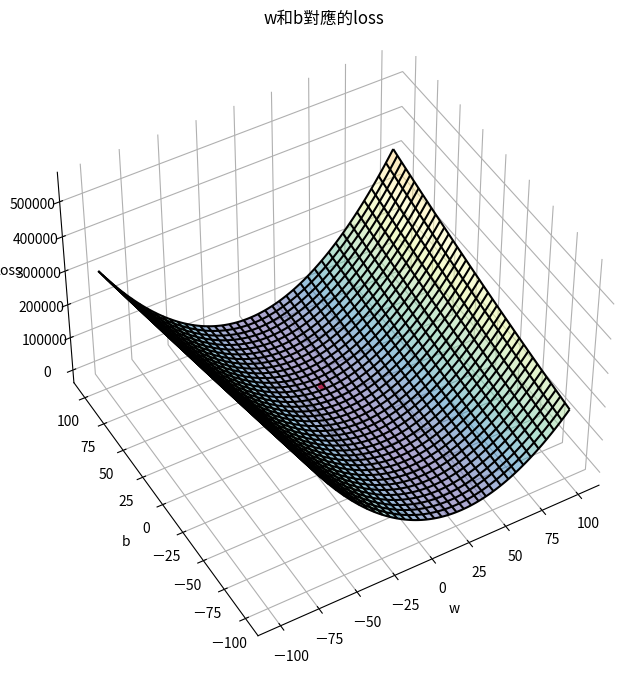

當w=[9], b=[29] 時有最小point_loss:[32.69484848]


In [11]:
# 設定字型
mlp.rc('font', family="ChineseFont")
plt.figure(figsize=(8,8))
# 指定3D立體圖
ax = plt.axes(projection="3d")
# 設定視角角度
ax.view_init(45,-120)
# 設定各軸網底顏色(R,G,B)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))
# 上一段有定義過temp_b及temp_w從-100到100，這邊將b_grid及w_grid定義成二為網格
b_grid, w_grid = np.meshgrid(temp_b, temp_w)
# 構圖(x, y, z, 顏色地圖, 曲面透明度)
ax.plot_surface(w_grid, b_grid, point_loss, cmap="Spectral_r", alpha = 0.5)
# 建構三軸的網格
ax.plot_wireframe(w_grid, b_grid, point_loss, color="black")
# 標籤
ax.set_title("w和b對應的loss")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")
# 找出損失最小時的w與b
w_index, b_index = np.where(point_loss == np.min(point_loss))
# 點出最佳解的點
ax.scatter(temp_w[w_index], temp_b[b_index], point_loss[w_index, b_index], color="red" )
# 呈現圖
plt.show()
print(f"當w={temp_w[w_index]}, b={temp_b[b_index]} 時有最小point_loss:{point_loss[w_index, b_index]}")
# 損失函數於(9,29)為最佳解，與前面測試推論的(9,30)非常接近

最後驗證殘差是否服從常態分配

In [12]:
  y_hat = 9 * x + 30
  residual = y - y_hat
  stat, p = stats.shapiro(residual)
  print(f"殘差的統計量為 {stat:.4f}，p值為 {p:.4f}")
  # P-value為0.2424，無法拒絕虛無假設，殘差服從常態分配

殘差的統計量為 0.9590，p值為 0.2424
